---
title: keras教程-06-优化器详细解释
date: 2018-09-01 20:17:55
tags: [keras教程]
toc: true
xiongzhang: false

---
<span></span>
<!-- more -->


本文代码运行环境:

- windows10
- python3.6
- jupyter notebook
- tensorflow 1.x
- keras 2.x

### 综述

优化器的选择在深度学习中是非常重要的, 所以我们在这里汇总了keras里内建的优化器(optimizer), 以便于我们在接下来的学习中能更清楚的知道如何选择优化器。下面我们依然按照本系列教程的思路, 先通过实验来得到一个感官认识,然后再从理论上分析一下。 下面是我们列出来的需要讨论的优化器:

- SGD 随机梯度下降优化器。
- RMSprop Geoff Hinton提出的一种自适应学习率方法
- Adagrad 自适应子梯度方法 在线学习和随机优化
- Adadelta 一种自适应学习率方法
- Adam 一种基于一阶梯度的随机目标函数优化算法，基于低阶矩的自适应估计
- Adamax
- Nadam
- TFOptimizer

下面代码来自上一篇文章: {% post_link keras教程-05-实验验证神经网络的深度-样本量-dropout %}

我们采用上一篇文章的代码是为了快速测试不同的优化器。

In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

def prepare_data(n=6000, test_n=3000):
    '''准备用到的数据'''
    nb_classes = 10
    # 这个方法可以加载数据
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(60000, 784)
    X_train = X_train[:n, :]
    y_train = y_train[:n]
    X_test = X_test.reshape(10000, 784)
    X_test = X_test[:test_n, :]
    y_test = y_test[:test_n]
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    Y_train = np_utils.to_categorical(y_train, nb_classes)
    Y_test = np_utils.to_categorical(y_test, nb_classes)
    return (X_train, Y_train), (X_test, Y_test)

def net_work(n_layer, has_dropout=False):
    model = Sequential()
    assert n_layer >= 1
    for i in range(n_layer):
        if i == 0:
            model.add(Dense(512, input_shape=(784,)))
        else:
            model.add(Dense(512))
        model.add(Activation('relu'))
        if has_dropout:
            model.add(Dropout(0.2))
    # 输出层
    model.add(Dense(10))
    # 分类任务的输出通常是softmax, 这保证的所有的输出值都在0-1之间, 并且他们之和为1
    model.add(Activation('softmax')) 
    return model


### 请注意, 这里我们可以传入一个参数: optimizer
def train(model, train_data, test_data, optimizer):
    X_train, y_train = train_data
    X_test, y_test = test_data
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model.fit(X_train, y_train,
          batch_size=128, epochs=20,
          validation_data=(X_test, y_test))

In [13]:
# prepare_data的第一个参数就是训练样本的样本量
train_data, test_data = prepare_data(8192)
results = {}

# 循环模型的层数
for opt in ('sgd', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'):
    print(f'Using optimizer: {opt} ###################')
    model = net_work(2, True)
    results[opt] = train(model, train_data, test_data, opt)

Using optimizer: sgd ###################
Train on 8192 samples, validate on 3000 samples
Epoch 1/20
8192/8192 [==============================] - 2s 250us/step - loss: 2.1350 - acc: 0.3016 - val_loss: 1.9318 - val_acc: 0.5853
Epoch 2/20
8192/8192 [==============================] - 1s 87us/step - loss: 1.7166 - acc: 0.6145 - val_loss: 1.5469 - val_acc: 0.6953
Epoch 3/20
8192/8192 [==============================] - 1s 84us/step - loss: 1.3232 - acc: 0.7262 - val_loss: 1.2065 - val_acc: 0.7550
Epoch 4/20
8192/8192 [==============================] - 1s 84us/step - loss: 1.0413 - acc: 0.7731 - val_loss: 0.9750 - val_acc: 0.7820
Epoch 5/20
8192/8192 [==============================] - 1s 85us/step - loss: 0.8575 - acc: 0.7970 - val_loss: 0.8295 - val_acc: 0.8100
Epoch 6/20
8192/8192 [==============================] - 1s 80us/step - loss: 0.7362 - acc: 0.8186 - val_loss: 0.7329 - val_acc: 0.8237
Epoch 7/20
8192/8192 [==============================] - 1s 78us/step - loss: 0.6552 - acc: 0.8319 - 

8192/8192 [==============================] - 1s 104us/step - loss: 0.0127 - acc: 0.9973 - val_loss: 0.1998 - val_acc: 0.9503
Epoch 18/20
8192/8192 [==============================] - 1s 105us/step - loss: 0.0096 - acc: 0.9982 - val_loss: 0.2095 - val_acc: 0.9473
Epoch 19/20
8192/8192 [==============================] - 1s 106us/step - loss: 0.0100 - acc: 0.9972 - val_loss: 0.2099 - val_acc: 0.9460
Epoch 20/20
8192/8192 [==============================] - 1s 121us/step - loss: 0.0073 - acc: 0.9988 - val_loss: 0.2129 - val_acc: 0.9470
Using optimizer: Nadam ###################
Train on 8192 samples, validate on 3000 samples
Epoch 1/20
8192/8192 [==============================] - 2s 269us/step - loss: 0.5246 - acc: 0.8372 - val_loss: 0.3264 - val_acc: 0.8970
Epoch 2/20
8192/8192 [==============================] - 1s 117us/step - loss: 0.1910 - acc: 0.9441 - val_loss: 0.2329 - val_acc: 0.9310
Epoch 3/20
8192/8192 [==============================] - 1s 117us/step - loss: 0.1147 - acc: 0.9646 - 

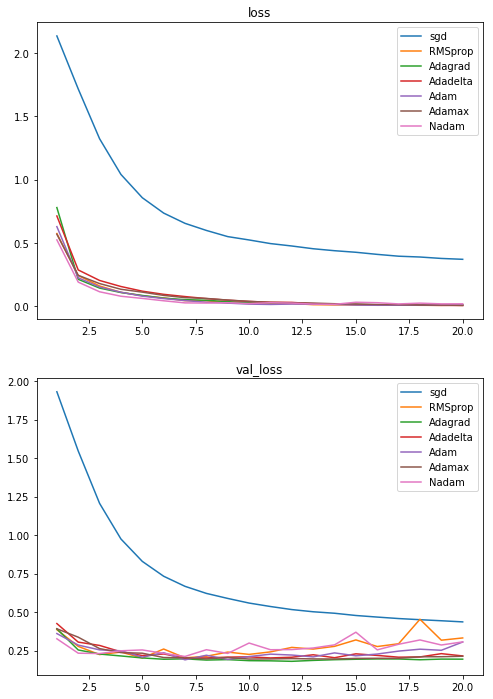

In [17]:
%matplotlib inline

plt.figure(figsize=(8,12))

i = 0
for metric in ('loss', 'val_loss'):
    i += 1
    plt.subplot(2, 1, i )
    for opt in results:
        r = results[opt]
        data = r.history[metric]
        plt.plot(range(1, len(data)+1), data,  label=opt)
        plt.title(metric)
        plt.legend()